Ariz Iqbal

Importing the dependencies

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [15]:
# loading a dataset to a pandas DataFrame
med_insurance_data = pd.read_csv('/content/insurance.csv')

In [16]:
print(med_insurance_data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [17]:
# printing the first 5 rows
med_insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# printing the last 5 rows
med_insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [19]:
# total number of rows & columns
med_insurance_data.shape

(1338, 7)

In [20]:
# getting some Informations about the dataset
med_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features



*   Sex
*   Smoker
*   Region



Data Analysis

In [21]:
# statistical measures of the dataset
med_insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['charges'].plot(kind='line', figsize=(8, 4), title='charges')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
# checking the missing values of the dataset
med_insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<ipython-input-23-a04ebcfb537e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(med_insurance_data['age'])


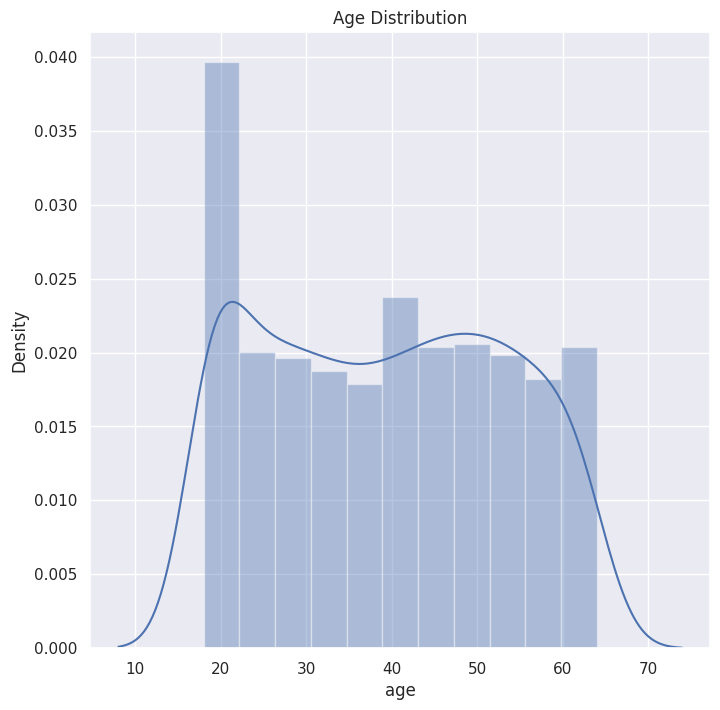

In [23]:
# distribution of  age value
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(med_insurance_data['age'])
plt.title('Age Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x800 with 0 Axes>

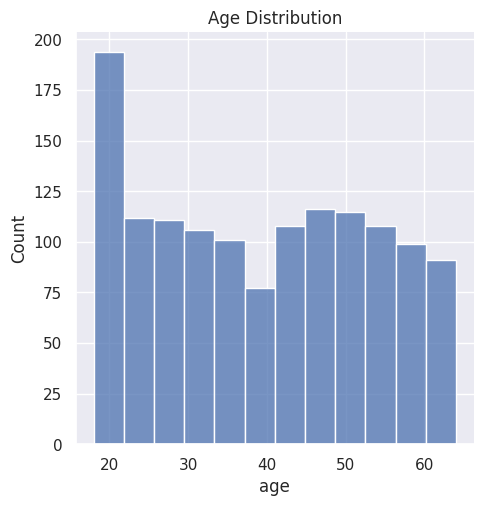

In [24]:
# distribution of  age value
sns.set()
plt.figure(figsize=(8,8))
sns.displot(med_insurance_data['age'])
plt.title('Age Distribution')
plt.show

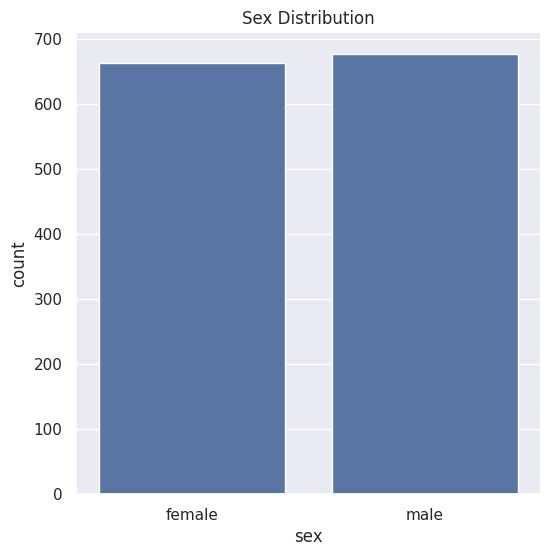

In [25]:
# Gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex' , data = med_insurance_data)
plt.title('Sex Distribution')
plt.show()


In [26]:
# we can count values in sex distribution
med_insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-27-88e9f8fdf562>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(med_insurance_data['bmi'])


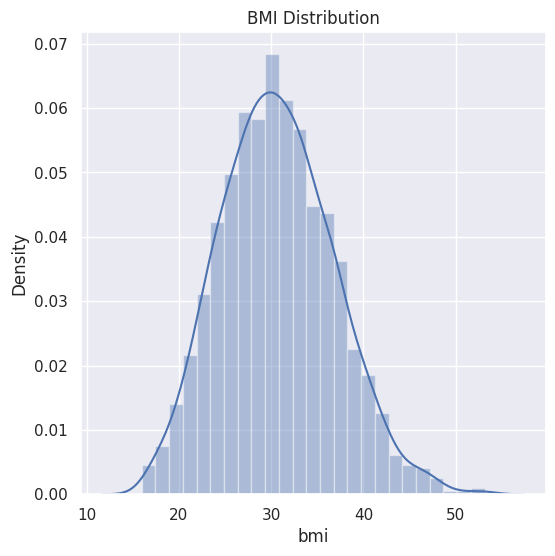

In [27]:
# bmi distribution
plt.figure(figsize = (6,6))
sns.distplot(med_insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9


1. if a person less than (<) 18.5 of bmi, than that person is underweighted

2. if a person greater than (>) 24.9 of bmi, than that person is overweighted

In this data more people are overweighted , so in this case it can make
affect the insurance cost of the person

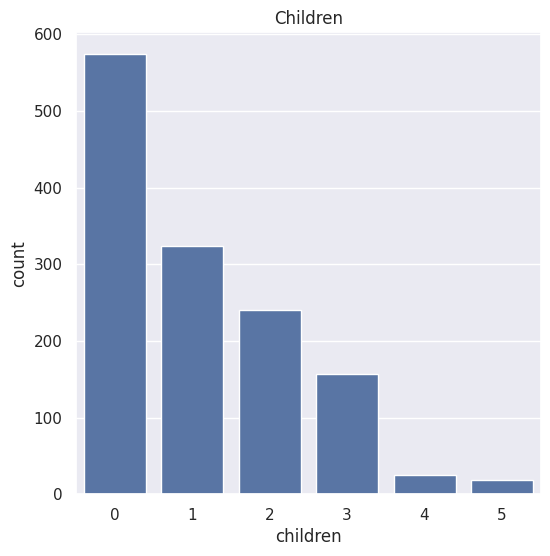

In [28]:
# children column
plt.figure(figsize = (6,6))
sns.countplot(x = 'children' , data = med_insurance_data)
plt.title("Children")
plt.show()

In [29]:
med_insurance_data['children'].value_counts()   # we can find how many variables store in a columns

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


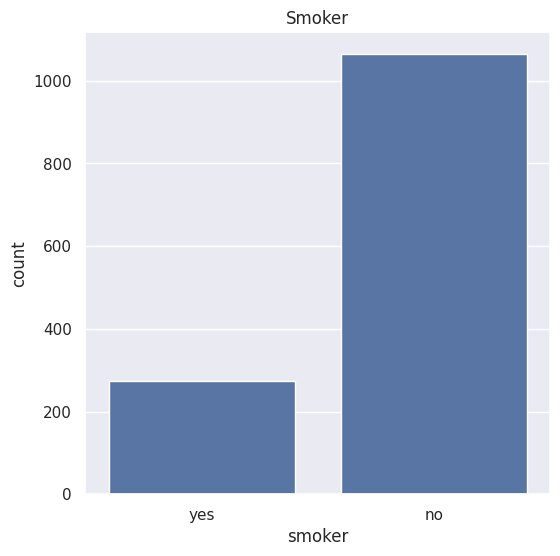

In [30]:
# Smoker Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker' , data = med_insurance_data)
plt.title('Smoker')
plt.show()

In [31]:
med_insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


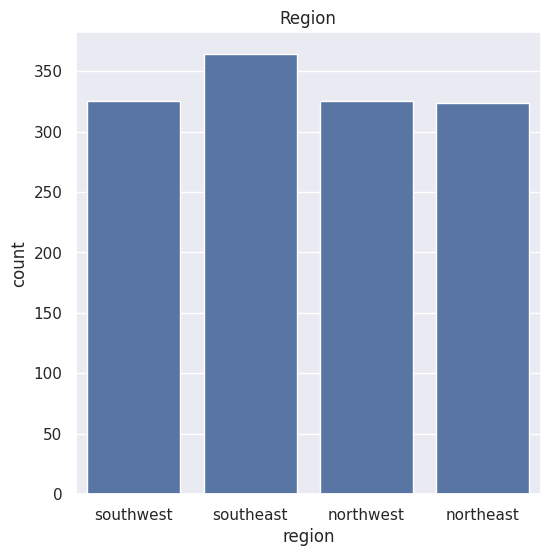

In [32]:
# region Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region' , data = med_insurance_data)
plt.title('Region')
plt.show()

In [33]:
med_insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-34-db0b3999caf2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(med_insurance_data['charges'])


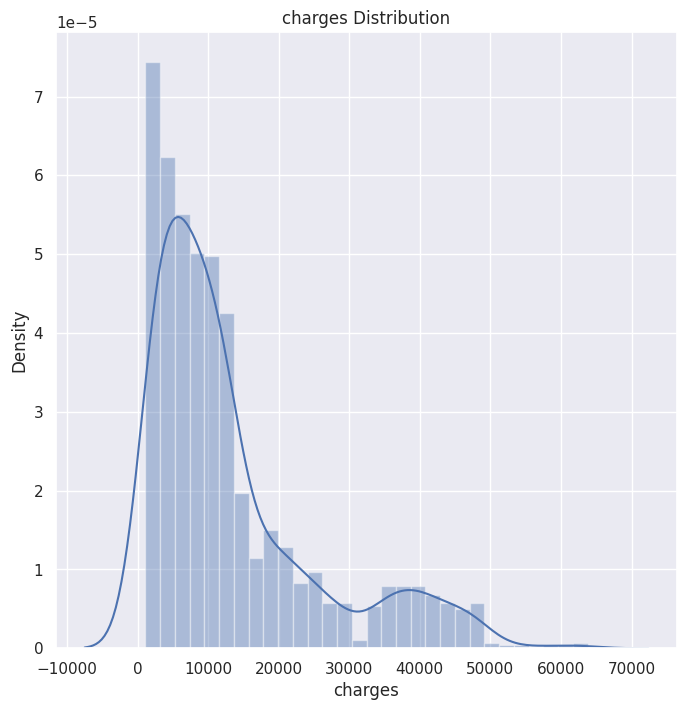

In [34]:
# distribution of  charges value
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(med_insurance_data['charges'])
plt.title('charges Distribution')
plt.show()

Data Pre-processing

Encoding the categorical features

In [35]:
# encoding sex column
med_insurance_data.replace({'sex':{'male': 0 , 'female': 1}}, inplace=True)

# encoding 'smoker' column
med_insurance_data.replace({'smoker':{'yes':0,'no':1}} , inplace=True)

# encoding 'region' column
med_insurance_data.replace({'region':{'southeast':0, 'southwest':1,'northeast':2 , 'northwest':3}}, inplace=True)

<ipython-input-35-4412683e70f4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  med_insurance_data.replace({'sex':{'male': 0 , 'female': 1}}, inplace=True)
<ipython-input-35-4412683e70f4>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  med_insurance_data.replace({'smoker':{'yes':0,'no':1}} , inplace=True)
<ipython-input-35-4412683e70f4>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

In [36]:
med_insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the features & Target

In [37]:
X = med_insurance_data.drop(columns='charges', axis = 1)
Y = med_insurance_data['charges']

In [38]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [39]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Test data

In [40]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2 , random_state=2)

In [41]:
print(X.shape ,X_train.shape , X_test.shape )

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [42]:
# loading the Linear Regression model
regressor = LinearRegression()

In [43]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [44]:
# prediction on training data
X_training_data_prediction = regressor.predict(X_train)

In [45]:
# R  squared value
r2_train = metrics.r2_score(Y_train , X_training_data_prediction)
print('R squares value : ' , r2_train)

R squares value :  0.751505643411174


In [46]:
# prediction on test data
X_test_data_prediction = regressor.predict(X_test)

In [47]:
# R  squared value
r2_test = metrics.r2_score(Y_test , X_test_data_prediction)
print('R squares value : ' , r2_test)

R squares value :  0.7447273869684076


Building  a Predictive System

In [48]:
input_data = (46,1,33.44,1,1,0)

# changing the input_data to numpy array
input_data_as_numpy_array =np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

print('The Insurance Cost is  USD : ', prediction[0])

[10657.40884992]
The Insurance Cost is  USD :  10657.408849921467


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
input_data = ( 19,1,27.9,0,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array =np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

print('The Insurance Cost is  USD : ', prediction[0])

[25597.73941347]
The Insurance Cost is  USD :  25597.73941346843


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
